In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
cancer = load_breast_cancer()
iris = load_iris()
wine = load_wine()

# Bagging을 사용한 분류

- bagging은 bootstrap aggregating의 줄임말
- 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
- 각각의 결과를 걸합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작

# KNN

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
estimator=base_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003021907806396484 (+/- 0.005558599371747533
avg score time: 0.006174468994140625 (+/- 0.007693132473304358
avg test score: 0.9648501785437045 (+/- 0.009609970350036127


In [7]:
cross_val = cross_validate(
estimator=bagging_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01324605941772461 (+/- 0.0035287766055449635
avg score time: 0.011557817459106445 (+/- 0.006226352856315988
avg test score: 0.9578481602235678 (+/- 0.016033681003007488


# SVC

In [8]:
base_model = make_pipeline(
StandardScaler(),
SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
estimator=base_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0008006572723388671 (+/- 0.0016013145446777343
avg score time: 0.005053281784057617 (+/- 0.005936786442530021
avg test score: 0.9736376339077782 (+/- 0.014678541667933545


In [10]:
cross_val = cross_validate(
estimator=bagging_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023660993576049803 (+/- 0.006844896303823371
avg score time: 0.00803980827331543 (+/- 0.008370226207077234
avg test score: 0.95960254618848 (+/- 0.02912376031873467


# Decision Tree

In [11]:
base_model = make_pipeline(
StandardScaler(),
DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
estimator=base_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006086921691894532 (+/- 0.006861260841294822
avg score time: 0.00019936561584472657 (+/- 0.00039873123168945315
avg test score: 0.9138643067846608 (+/- 0.01040959348294324


In [13]:
cross_val = cross_validate(
estimator=bagging_model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017269325256347657 (+/- 0.008274446966331313
avg score time: 0.0064754486083984375 (+/- 0.007532852926382371
avg test score: 0.9525539512498058 (+/- 0.021186042223407395


# Ramdom Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = make_pipeline(
StandardScaler(),
RandomForestClassifier()
)

In [16]:
cross_val = cross_validate(
estimator=model,
X=iris.data,
y=iris.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07700252532958984 (+/- 0.0057800200847400755
avg score time: 0.009603261947631836 (+/- 0.007852016466864698
avg test score: 0.9666666666666668 (+/- 0.02108185106778919


In [17]:
cross_val = cross_validate(
estimator=model,
X=wine.data,
y=wine.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08643817901611328 (+/- 0.005017632653989917
avg score time: 0.0033447742462158203 (+/- 0.006689548492431641
avg test score: 0.9777777777777779 (+/- 0.02721655269759088


In [18]:
cross_val = cross_validate(
estimator=model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11757369041442871 (+/- 0.0014101251202199808
avg score time: 0.006686592102050781 (+/- 0.008189383827149864
avg test score: 0.9631113181183046 (+/- 0.020284543682207744


# AdaBoost

- 대표적인 부스팅 알고리즘
- 일련의 약한 모델들을 학습
- 수정된 버전의 데이터를 반복 학습(가중치가 적용된)
- 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
- 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별샘플에 대한 가중치가 수정되고 다시 모델이 학습
 - 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
 - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
 model = make_pipeline(
StandardScaler(),
AdaBoostClassifier()
)

In [21]:
cross_val = cross_validate(
estimator=model,
X=iris.data,
y=iris.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03605484962463379 (+/- 0.008051033319696293
avg score time: 0.010373830795288086 (+/- 0.006616291805016494
avg test score: 0.9466666666666667 (+/- 0.03399346342395189


In [22]:
cross_val = cross_validate(
estimator=model,
X=wine.data,
y=wine.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.042772865295410155 (+/- 0.007399740225808607
avg score time: 0.007245540618896484 (+/- 0.007076321215085155
avg test score: 0.8085714285714285 (+/- 0.16822356718459935


In [23]:
cross_val = cross_validate(
estimator=model,
X=cancer.data,
y=cancer.target,
cv=5
)
print('avg fit time: {} (+/- {}'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {}'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08270225524902344 (+/- 0.008820080078603156
avg score time: 0.009659004211425782 (+/- 0.007737768090349721
avg test score: 0.9718677224033534 (+/- 0.0195587047134823


# Voting Classifier

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
 - 가장 많이 예측된 클래스를 정답으로 채택(hard voting)
 - 예측된 확률의 가중치 평균(soft voting)

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [25]:
# hard voting
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [26]:
for model in (model1, model2, model3, vote_model):
    print(type(model))

<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.naive_bayes.GaussianNB'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._voting.VotingClassifier'>


In [28]:
for model in (model1, model2, model3, vote_model):
    print(str(type(model)).split('.')[-1])

SVC'>
GaussianNB'>
RandomForestClassifier'>
VotingClassifier'>


In [29]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), model_name))


Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [30]:
# soft voting
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 1, 2]
)


In [31]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


# XGBoost

- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
- XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습 가능
- kaggle 도전 데이터 과학자에서 5년 연속 1위한 알고리즘


In [32]:
!pip install xgboost

In [33]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, random_state=123)

In [35]:
xgbc = XGBClassifier(n_esimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

[16:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_esimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_esimators=400,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

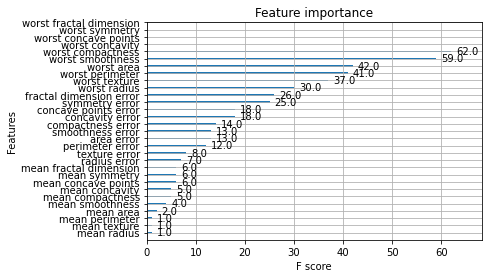

In [36]:
# 중요 변수 확인 및 시각화 : y에 영향을 미치는 변수
plot_importance(xgbc)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.show()

In [37]:
y_pred = xgbc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

